In [23]:
import akshare as ak
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import snoop
from loguru import logger
from pylab import legend
from snoop import pp
from ystocks.netvalues import NetValueCalculator

%matplotlib inline
snoop.install()

In [24]:
init_net_value = 1.0000
csv_file = '../test-cached/三羊开泰/net_value_2018.csv'

In [25]:
raw_net_value_df = pd.read_csv(csv_file, parse_dates=['时间'])
raw_net_value_df.rename(columns={'时间': '日期'}, inplace=True)

raw_net_value_df.drop(columns=['5日涨跌幅'], inplace=True)

raw_net_value_df['增加资产'].fillna(value=0, inplace=True)

raw_net_value_df[['总资产', '总份数', '增加资产', '增加份额']] = round(
    raw_net_value_df[['总资产', '总份数', '增加资产', '增加份额']].replace('[\¥,]', '', regex=True), 4
).astype('float')
raw_net_value_df.head()

,日期,净值,总资产,总份数,增加资产,增加份额,备注
0,2018-01-01,1.0000,6494005.25,6.494005e+06,6494005.25,6.494005e+06,NaN
1,2018-01-02,1.0156,6595041.35,6.494005e+06,0.00,0.000000e+00,NaN
2,2018-01-03,1.0281,6748813.81,6.564520e+06,71612.17,7.051507e+04,NaN
3,2018-01-10,1.1213,7360716.17,6.564520e+06,0.00,0.000000e+00,NaN
4,2018-01-11,1.1127,7380236.70,6.632488e+06,76211.43,6.796777e+04,NaN


In [26]:
# class NetValueCaculator:
#     nv_df: pd.DataFrame

#     def __init__(self):
#         self.nv_df = pd.DataFrame(columns=['日期', '净值', '增加资产', '增加份额', '总资产'])

#     def display(self):
#         format_dict = {
#             '日期': lambda x: "{}".format(x.strftime('%Y-%m-%d')),
#             '净值': '{0:.4f}',
#             '增加资产': '¥{0:,.2f}',
#             '增加份额': '{0:.4f}',
#             '总资产': '¥{0:,.2f}',
#         }

#         view = self.nv_df.style.format(format_dict).bar(
#             color='lightgreen', vmin=1, subset=['净值'], align='zero'
#         )
#         return view

#     def _get_total_shares(self):
#         return self.nv_df['增加份额'].sum()

#     def snapshot(self):
#         return self.nv_df.copy()

#     def plot(self):
#         plt.rcParams["font.family"] = 'Arial Unicode MS'  # 设置字体，正常显示中文
#         plt.rcParams['axes.unicode_minus'] = False  # 设置字体，正常显示中文
#         plt.figure(figsize=(12, 9))

#         plt.plot(
#             self.nv_df['日期'],
#             self.nv_df['净值'],
#             label='三羊开泰',
#         )
        
#         return plt

#     def record_invest(self, date_time, invest_value, add_cash=0):
#         row = None
#         if len(self.nv_df) == 0:
#             logger.debug('init ...')
#             net_value = 1.0000
#             add_shares = add_cash / net_value
#             total = add_cash

#             row = [
#                 [
#                     pd.to_datetime(date_time),
#                     net_value,
#                     add_cash,
#                     add_shares,
#                     total,
#                 ]
#             ]
#         else:
#             last_index = len(self.nv_df) - 1
#             last_net_value = self.nv_df.loc[last_index, '净值']
#             add_shares = add_cash / last_net_value

#             new_total = invest_value + add_cash
#             last_total_shares = self._get_total_shares()
#             total_shares = last_total_shares + add_shares
#             net_value = invest_value / total_shares

#             row = [
#                 [
#                     pd.to_datetime(date_time),
#                     net_value,
#                     add_cash,
#                     add_shares,
#                     invest_value,
#                 ]
#             ]
#         if row:
#             row_df = pd.DataFrame(row, columns=self.nv_df.columns)
#             self.nv_df = pd.concat([self.nv_df, row_df], ignore_index=True)

In [27]:
nv_c_test = NetValueCalculator()
nv_c_test.record_invest('2018-01-01', 0, 6494005.25)
nv_c_test.record_invest('2018-01-02', 6595041.35)
nv_c_test.record_invest('2018-01-03', 6748813.81, 71612.17)
nv_c_test.record_invest('2018-01-10', 7360716.17)
nv_c_test.display()

2022-08-08 10:39:05.692 | DEBUG    | ystocks.netvalues:record_invest:52 - init ...


,日期,净值,增加资产,增加份额,总资产
0,2018-01-01,1.0000,"¥6,494,005.25",6494005.2500,"¥6,494,005.25"
1,2018-01-02,1.0156,¥0.00,0.0000,"¥6,595,041.35"
2,2018-01-03,1.0281,"¥71,612.17",70515.0708,"¥6,748,813.81"
3,2018-01-10,1.1213,¥0.00,0.0000,"¥7,360,716.17"


In [32]:
nv_c = NetValueCalculator()
for i, row in raw_net_value_df.iterrows():
    date_time = row['日期']
    invest_value = row['总资产']
    add_cash = row['增加资产']
    nv_c.record_invest(date_time, invest_value, add_cash)

2022-08-08 10:41:33.759 | DEBUG    | ystocks.netvalues:record_invest:52 - init ...


In [33]:
net_values_df = nv_c.take_snapshot()

open_fund_df = ak.fund_open_fund_info_em(fund='510300', indicator="单位净值走势")

open_fund_df['净值日期'] = pd.to_datetime(open_fund_df['净值日期'])
for_plot_df = open_fund_df.loc[open_fund_df['净值日期'].isin(net_values_df['日期'])].reset_index()
for_plot_df

,index,净值日期,单位净值,日增长率
0,1375,2018-01-02,4.1346,1.3979
1,1376,2018-01-03,4.1588,0.5853
2,1381,2018-01-10,4.2564,0.4413
3,1382,2018-01-11,4.2542,-0.0517
4,1398,2018-02-02,4.2745,0.5859
...,...,...,...,...
188,1614,2018-12-24,3.0982,0.2913
189,1615,2018-12-25,3.0770,-0.6843
190,1616,2018-12-26,3.0612,-0.5135
191,1617,2018-12-27,3.0494,-0.3855


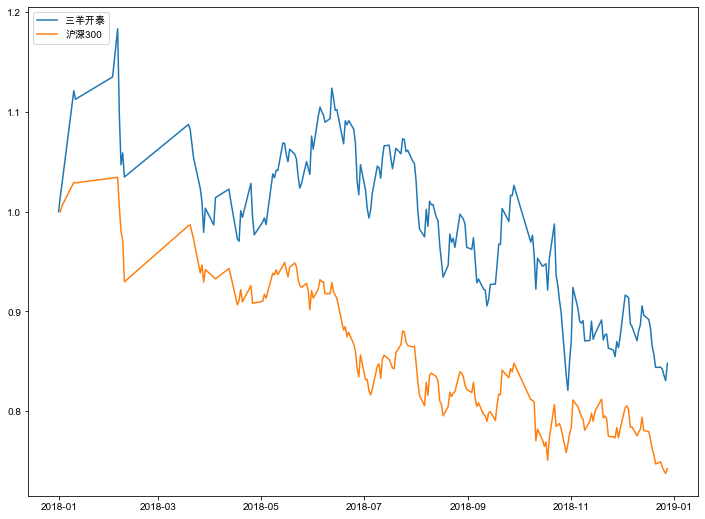

In [34]:
plt = nv_c.plot()

plt.plot(
    for_plot_df['净值日期'],
    for_plot_df['单位净值'] / for_plot_df['单位净值'][0],
    label='沪深300',
    )

plt.axis('tight')
legend(loc='upper left')


In [ ]:
# nv_c.display()

In [ ]:
# compare_df = nv_c.snapshot()
# compare_df['对比'] = raw_net_value_df['净值']
# compare_df.loc[round(compare_df['净值'], 4) != compare_df['对比']].head()
# compare_df